# This notebook must be run using google colab

## Setup the envrionment

In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Path variables
path_train_dataset = '/content/drive/MyDrive/flower_beds_256'
path_test_dataset = '/content/drive/MyDrive/Fast-Texture-Synthesis/Test_data'
path_checkpoint = '/content/drive/MyDrive/Fast-Texture-Synthesis/models_checkpoints'

In [3]:
! pip install tensorpack -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.3/296.3 KB 6.2 MB/s eta 0:00:00


In [4]:
# You need this version of SciPy in order to run the Gatys model
! pip install scipy==1.8.0 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 15.3 MB/s eta 0:00:00


In [5]:
! git clone https://github.com/ThibaudE/Fast-Texture-Synthesis.git

Cloning into 'Fast-Texture-Synthesis'...
remote: Enumerating objects: 114, done.
remote: Counting objects: 100% (114/114), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 114 (delta 49), reused 87 (delta 30), pack-reused 0
Receiving objects: 100% (114/114), 40.37 MiB | 22.14 MiB/s, done.
Resolving deltas: 100% (49/49), done.


In [6]:
! cd Fast-Texture-Synthesis/texture_utils/ && wget https://s3-us-west-2.amazonaws.com/wengaoye/vgg19_normalised.npz

--2023-03-20 17:34:36--  https://s3-us-west-2.amazonaws.com/wengaoye/vgg19_normalised.npz
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.221.64, 52.218.178.200, 52.92.139.24, ...
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.221.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 160200914 (153M) [application/x-www-form-urlencoded]
Saving to: ‘vgg19_normalised.npz’

vgg19_normalised.np 100%[===================>] 152.78M  35.4MB/s    in 4.8s    

2023-03-20 17:34:42 (31.6 MB/s) - ‘vgg19_normalised.npz’ saved [160200914/160200914]



In [7]:
! cp {path_train_dataset}/* /content/Fast-Texture-Synthesis/data/train
! cp {path_test_dataset}/* /content/Fast-Texture-Synthesis/data/test

In [8]:
! cp {path_checkpoint}/improved_model/* /content/Fast-Texture-Synthesis/checkpoint/improved_model
! cp {path_checkpoint}/adaptive_model/* /content/Fast-Texture-Synthesis/checkpoint/adaptive_model

## Generate some images

In [9]:
! mkdir /content/Fast-Texture-Synthesis/data/results/improved_model/our_weights

In [10]:
# Repository weights
! cd /content/Fast-Texture-Synthesis && CUDA_VISIBLE_DEVICES=0 python ./po/improved_model.py --test-only --data-folder data --test-ckpt checkpoint/improved_model/model-796000.data-00000-of-00001 --test-folder data/results/improved_model

2023-03-20 17:36:14.801594: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 17:36:16.043210: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-20 17:36:16.043322: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-20 17:36:16.043340: W tensorfl

In [11]:
# Our weights
! cd /content/Fast-Texture-Synthesis && CUDA_VISIBLE_DEVICES=0 python ./po/improved_model.py --test-only --data-folder data --test-ckpt checkpoint/improved_model/model-24000.data-00000-of-00001 --test-folder data/results/improved_model/our_weights

2023-03-20 17:37:36.856742: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 17:37:38.177886: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-20 17:37:38.178004: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-20 17:37:38.178044: W tensorfl

In [12]:
! cd /content/Fast-Texture-Synthesis && CUDA_VISIBLE_DEVICES=0 python ./po/adaptive_model.py --test-only --data-folder data --test-ckpt checkpoint/adaptive_model/model-140000.data-00000-of-00001 --test-folder data/results/adaptive_model

2023-03-20 17:38:54.778391: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 17:38:55.987233: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-20 17:38:55.987390: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-20 17:38:55.987422: W tensorfl

In [15]:
from PIL import Image
import os

image_folder = '/content/Fast-Texture-Synthesis/data/test'

resized_folder = os.path.join(image_folder, 'resized_images')
if not os.path.exists(resized_folder):
    os.mkdir(resized_folder)

for filename in os.listdir(image_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(image_folder, filename)
        with Image.open(image_path) as image:
            resized_image = image.resize((256, 256))
            resized_image_path = os.path.join(resized_folder, 'resized_' + filename)
            resized_image.save(resized_image_path)

In [ ]:
! cd /content/Fast-Texture-Synthesis && python ./gatys/synthesizer.py --image-path data/test/resized_images/resized_test_image.jpg --save-folder data/results/gatys_model 

2023-03-20 13:45:33.080030: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 13:45:35.530476: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-20 13:45:35.530707: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-20 13:45:35.530730: W tensorfl

In [ ]:
! cd /content/Fast-Texture-Synthesis && python ./gatys/synthesizer.py --image-path data/test/resized_images/resized_test_flower_1.jpg --save-folder data/results/gatys_model 

2023-03-20 14:34:37.176473: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 14:34:38.825649: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-20 14:34:38.826117: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-20 14:34:38.826161: W tensorfl

In [ ]:
! cd /content/Fast-Texture-Synthesis && python ./gatys/synthesizer.py --image-path data/test/resized_images/resized_test_flower_2.jpg --save-folder data/results/gatys_model 

2023-03-20 15:25:00.701420: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 15:25:03.412203: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-20 15:25:03.412477: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-20 15:25:03.412511: W tensorfl

In [ ]:
! cd /content/Fast-Texture-Synthesis && python ./gatys/synthesizer.py --image-path data/test/resized_images/resized_test_flower_3.jpg --save-folder data/results/gatys_model 

2023-03-20 16:15:54.993990: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 16:15:56.918886: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-20 16:15:56.919041: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-20 16:15:56.919072: W tensorfl

In [17]:
! cd /content/Fast-Texture-Synthesis && python ./gatys/synthesizer.py --image-path data/test/resized_images/resized_test_texture.jpg --save-folder data/results/gatys_model 

2023-03-20 17:41:06.376563: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-20 17:41:07.988632: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-20 17:41:07.988769: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-20 17:41:07.988794: W tensorfl

## Already seen images

In [45]:
from matplotlib import pyplot as plt

def visualize(img1, img2, img3, img4):
    fig = plt.figure(figsize=(15, 12))
    Image1 = plt.imread(img1)
    Image2 = plt.imread(img2)
    Image3 = plt.imread(img3)
    Image4 = plt.imread(img4)

    fig.add_subplot(4, 1, 1)
    plt.imshow(Image1)
    plt.axis('off')
    plt.title("Using Progressive Pseudo Optimizer (train with 200 epochs)")

    fig.add_subplot(4, 1, 2)
    plt.imshow(Image2)
    plt.axis('off')
    plt.title("Using Progressive Pseudo Optimizer (train with 6 epochs)")

    fig.add_subplot(4, 1, 3)
    plt.imshow(Image3)
    plt.axis('off')
    plt.title("Using Adaptive Pseudo Optimizer")

    fig.add_subplot(4, 1, 4)
    plt.imshow(Image4)
    plt.axis('off')
    plt.title("Using Gatys Model")

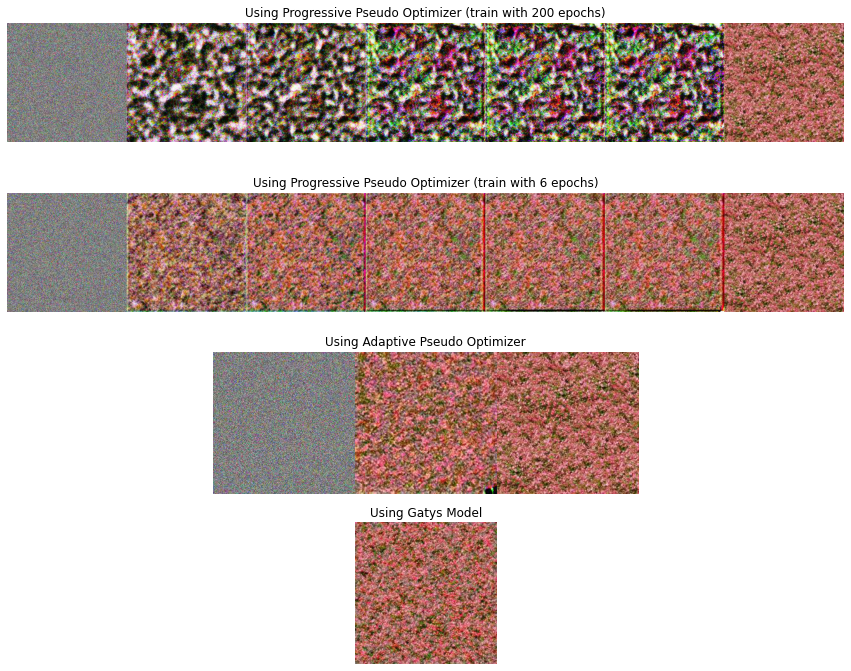

In [46]:
visualize('/content/Fast-Texture-Synthesis/data/results/improved_model/test-0.jpg', '/content/Fast-Texture-Synthesis/data/results/improved_model/our_weights/test-0.jpg', '/content/Fast-Texture-Synthesis/data/results/adaptive_model/test-0.jpg', '/content/Fast-Texture-Synthesis/data/results/gatys_model/resized_test_flower_1.jpg')

## Unseen images

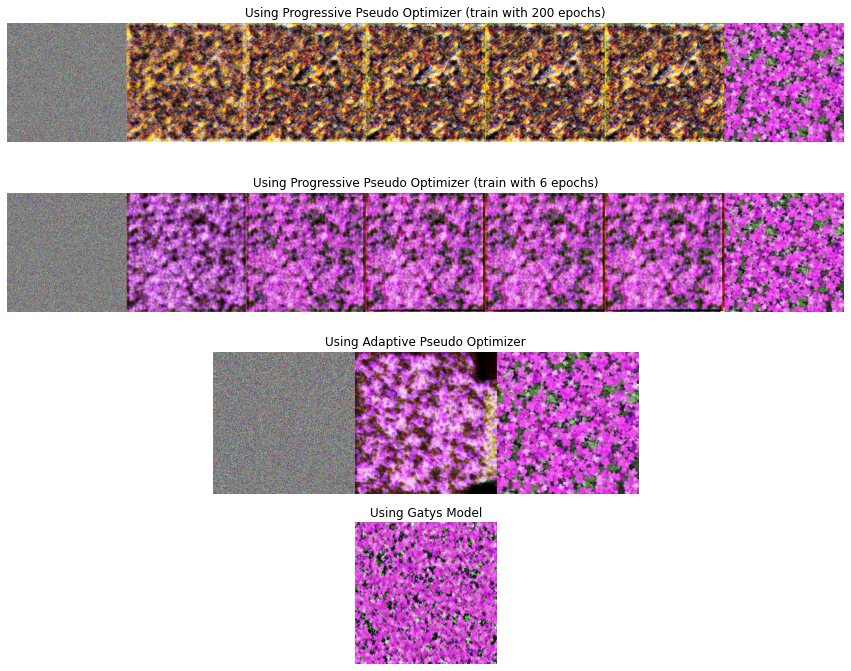

In [47]:
visualize('/content/Fast-Texture-Synthesis/data/results/improved_model/test-1.jpg', '/content/Fast-Texture-Synthesis/data/results/improved_model/our_weights/test-1.jpg','/content/Fast-Texture-Synthesis/data/results/adaptive_model/test-1.jpg', '/content/Fast-Texture-Synthesis/data/results/gatys_model/resized_test_flower_2.jpg')

## Images with occlusion

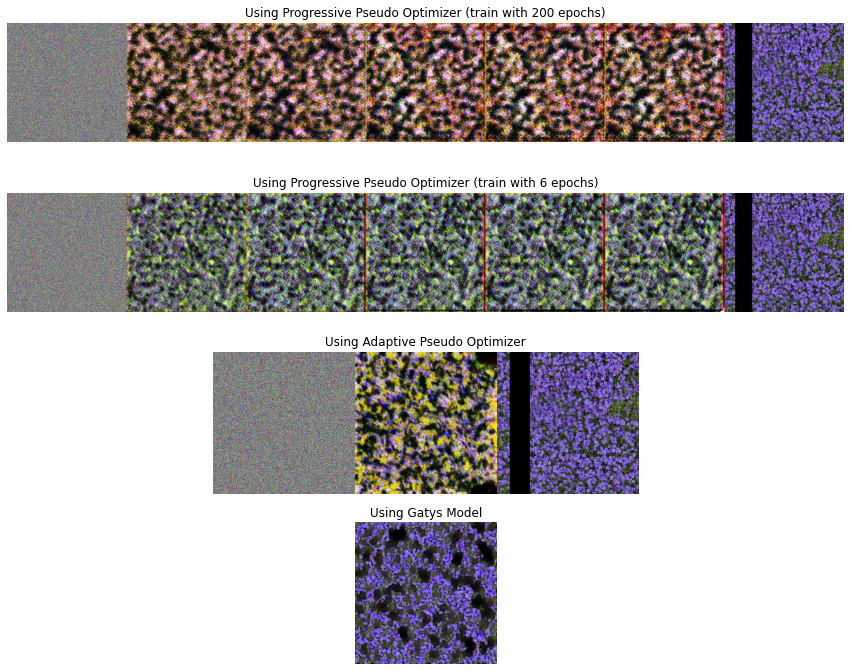

In [48]:
visualize('/content/Fast-Texture-Synthesis/data/results/improved_model/test-2.jpg', '/content/Fast-Texture-Synthesis/data/results/improved_model/our_weights/test-2.jpg','/content/Fast-Texture-Synthesis/data/results/adaptive_model/test-2.jpg', '/content/Fast-Texture-Synthesis/data/results/gatys_model/resized_test_flower_3.jpg')

## Not a flower bed texture

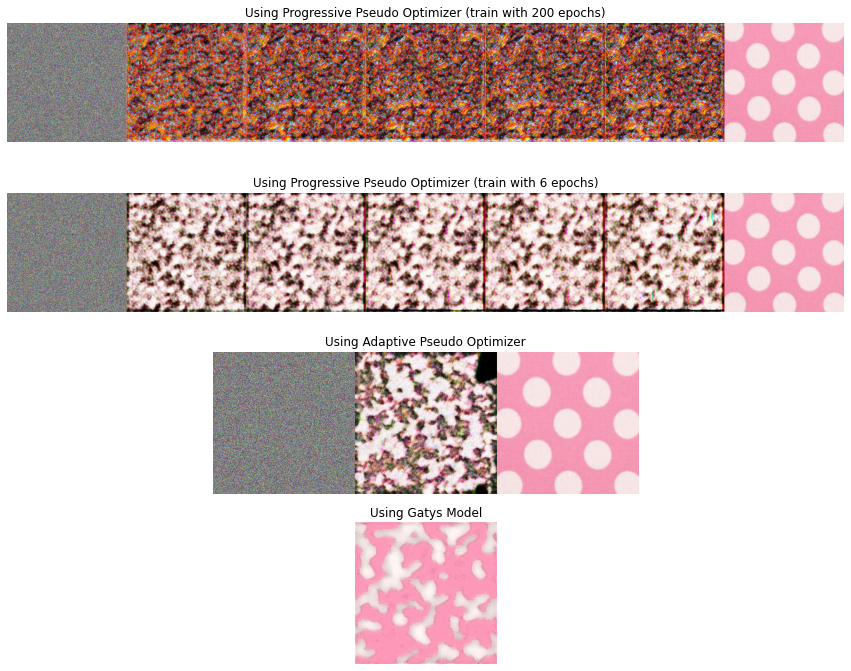

In [49]:
visualize('/content/Fast-Texture-Synthesis/data/results/improved_model/test-4.jpg', '/content/Fast-Texture-Synthesis/data/results/improved_model/our_weights/test-4.jpg','/content/Fast-Texture-Synthesis/data/results/adaptive_model/test-4.jpg', '/content/Fast-Texture-Synthesis/data/results/gatys_model/resized_test_texture.jpg')

## Test on a normal image

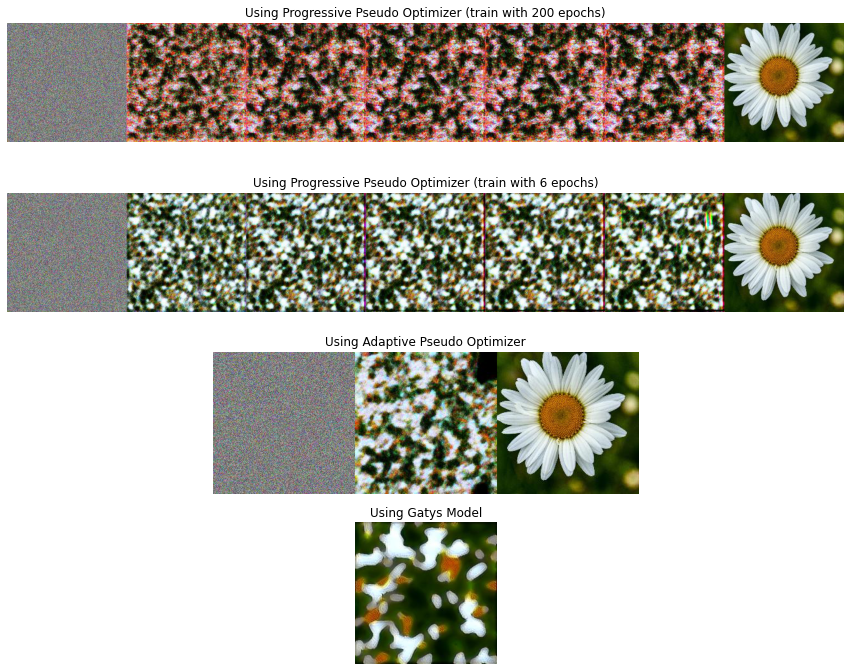

In [50]:
visualize('/content/Fast-Texture-Synthesis/data/results/improved_model/test-3.jpg', '/content/Fast-Texture-Synthesis/data/results/improved_model/our_weights/test-3.jpg','/content/Fast-Texture-Synthesis/data/results/adaptive_model/test-3.jpg', '/content/Fast-Texture-Synthesis/data/results/gatys_model/resized_test_image.jpg')